In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn import preprocessing 
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
cap= pd.read_csv('a1.csv')

In [3]:
cap.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
cap.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
cap.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
cap.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The data set contains 4 catagorical and 13 numerical columns

In [8]:
cap['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [9]:
cap['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [10]:
le=LabelEncoder()
cap['Month']=le.fit_transform(cap['Month'])
cap['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [11]:
le1=LabelEncoder()
cap['VisitorType']=le1.fit_transform(cap['VisitorType'])
cap['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [12]:
le1=LabelEncoder()
cap['Weekend']=le1.fit_transform(cap['Weekend'])
cap['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [13]:
cap['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

<AxesSubplot:>

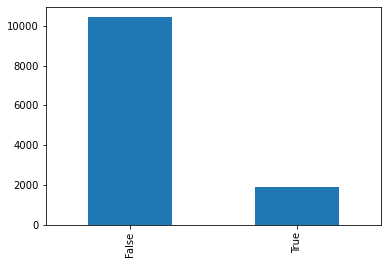

In [14]:
cap['Revenue'].value_counts().plot(kind='bar')

In [15]:
cap.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


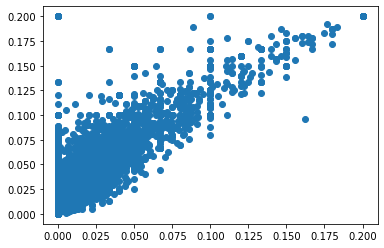

In [16]:
plt.scatter(cap['BounceRates'],cap['ExitRates'])

<AxesSubplot:>

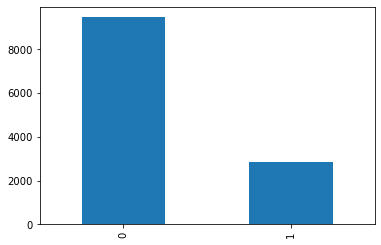

In [17]:
cap['Weekend'].value_counts().plot(kind='bar')

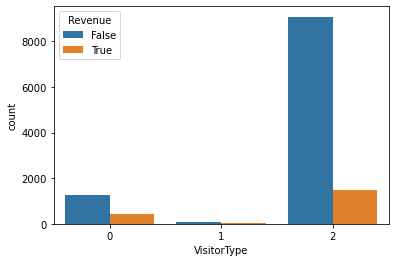

In [18]:
sns.countplot('VisitorType',data=cap,hue='Revenue',)  #this is for categorical of data
plt.show()

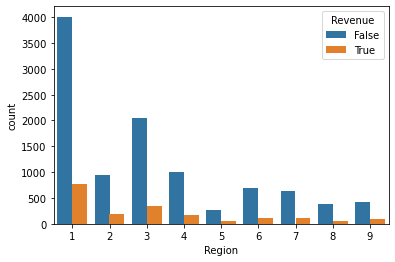

In [19]:
sns.countplot('Region',data=cap,hue='Revenue',)  #this is for categorical of data
plt.show()

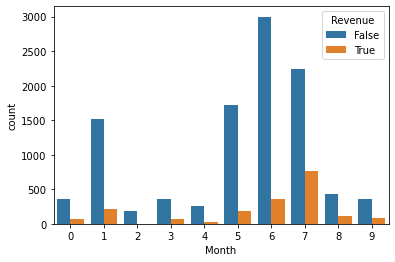

In [20]:
sns.countplot('Month',data=cap,hue='Revenue',)  #this is for categorical of data
plt.show()

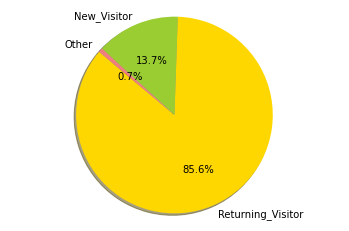

In [21]:
labels = 'Returning_Visitor', 'New_Visitor', 'Other'
sizes = [10551,  1694,  85]
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


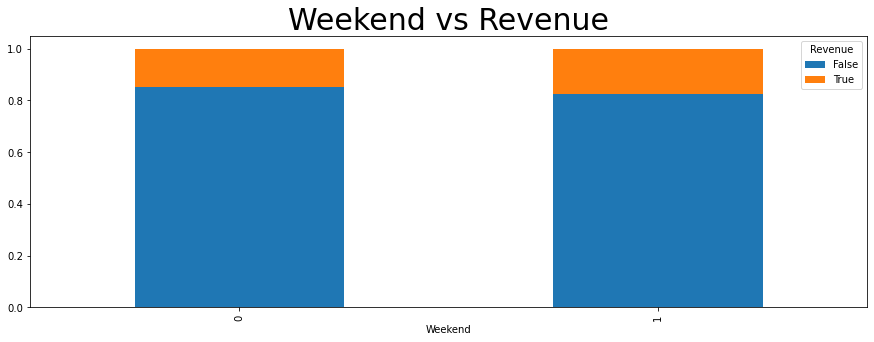

In [22]:

df1 = pd.crosstab(cap['Weekend'], cap['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

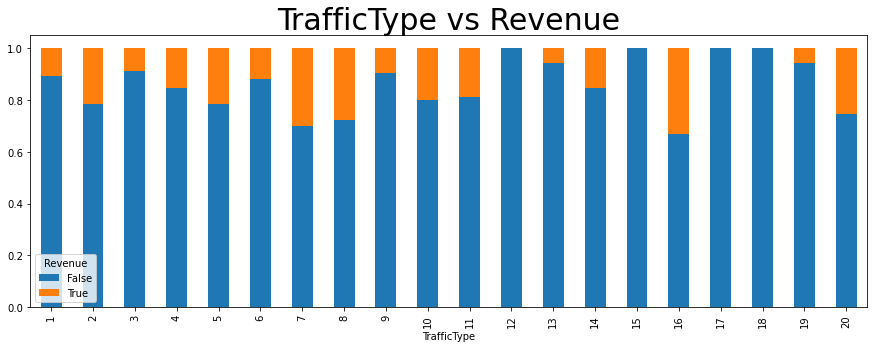

In [23]:
df4 = pd.crosstab(cap['TrafficType'], cap['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('TrafficType vs Revenue', fontsize = 30)
plt.show()

In [24]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [25]:
# Lets shuffle the data before creating the subsamples

df = cap.sample(frac=1)


True_revenue = cap.loc[cap['Revenue'] == 1]
False_revenue = cap.loc[cap['Revenue'] == 0][:2000]

distributed_df = pd.concat([True_revenue,False_revenue])

# Shuffle dataframe rows
new_df = distributed_df.sample(frac=1, random_state=42)

new_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12228,0,0.000000,0,0.00,14,999.000000,0.000000,0.023077,8.482952,0.0,1,2,2,3,6,2,0,True
968,0,0.000000,0,0.00,33,3506.166667,0.000000,0.025000,0.000000,0.0,5,1,1,1,1,2,1,False
54,0,0.000000,0,0.00,4,135.666667,0.050000,0.025000,0.000000,0.4,2,3,3,1,4,2,0,False
204,1,119.000000,0,0.00,12,297.666667,0.000000,0.008333,0.000000,0.0,5,3,2,1,10,2,0,False
10440,9,198.433333,7,636.75,113,3312.879422,0.004032,0.016482,0.000000,0.0,7,2,2,2,2,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8481,2,75.000000,0,0.00,26,2058.300000,0.000000,0.012500,8.524549,0.0,7,1,1,9,8,0,0,True
9255,0,0.000000,0,0.00,113,5178.531731,0.003896,0.030192,0.000000,0.0,7,2,2,3,2,2,0,True
7166,1,10.000000,0,0.00,25,583.350000,0.000000,0.016000,71.074356,0.0,8,1,1,1,2,2,0,True
1751,7,156.000000,0,0.00,60,2126.461941,0.008088,0.017067,0.000000,0.0,5,3,2,4,2,2,0,False


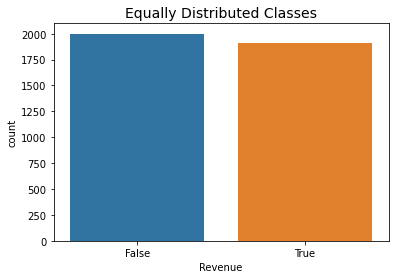

In [26]:

sns.countplot('Revenue', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

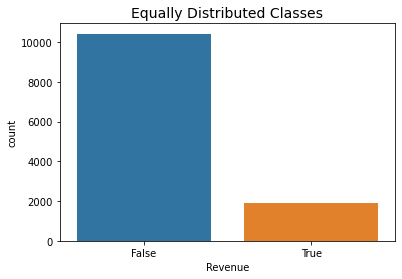

In [27]:

sns.countplot('Revenue', data=cap)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [28]:
x=new_df.drop(['Revenue'],1)
y=new_df['Revenue']

In [29]:
x.shape

(3908, 17)

In [30]:
y.shape

(3908,)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [32]:
x_train.shape

(2735, 17)

In [33]:
x_test.shape

(1173, 17)

In [34]:
x

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
12228,0,0.000000,0,0.00,14,999.000000,0.000000,0.023077,8.482952,0.0,1,2,2,3,6,2,0
968,0,0.000000,0,0.00,33,3506.166667,0.000000,0.025000,0.000000,0.0,5,1,1,1,1,2,1
54,0,0.000000,0,0.00,4,135.666667,0.050000,0.025000,0.000000,0.4,2,3,3,1,4,2,0
204,1,119.000000,0,0.00,12,297.666667,0.000000,0.008333,0.000000,0.0,5,3,2,1,10,2,0
10440,9,198.433333,7,636.75,113,3312.879422,0.004032,0.016482,0.000000,0.0,7,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8481,2,75.000000,0,0.00,26,2058.300000,0.000000,0.012500,8.524549,0.0,7,1,1,9,8,0,0
9255,0,0.000000,0,0.00,113,5178.531731,0.003896,0.030192,0.000000,0.0,7,2,2,3,2,2,0
7166,1,10.000000,0,0.00,25,583.350000,0.000000,0.016000,71.074356,0.0,8,1,1,1,2,2,0
1751,7,156.000000,0,0.00,60,2126.461941,0.008088,0.017067,0.000000,0.0,5,3,2,4,2,2,0


In [35]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.855924978687127

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_matrix

,Predicted:0,Predicted:1
Actual:0,528,51
Actual:1,118,476


In [38]:
de=DecisionTreeClassifier()
de.fit(x_train,y_train)
y_pred1=de.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred1)

0.9607843137254902

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_matrix

,Predicted:0,Predicted:1
Actual:0,559,20
Actual:1,26,568


In [42]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [43]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9607843137254902 

 The Miss-classification = 1-Accuracy =  0.039215686274509776 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9562289562289562 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9654576856649395 

 Positive Predictive value = TP / (TP+FP) =  0.9659863945578231 

 Negative predictive Value = TN / (TN+FN) =  0.9555555555555556 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  27.682828282828243 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.045337091848719785
